In [65]:
import util
import vqe_class
import ansatz_circ

import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib import animation

from qiskit.primitives import Estimator,Sampler
from qiskit_aer import AerSimulator
from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM

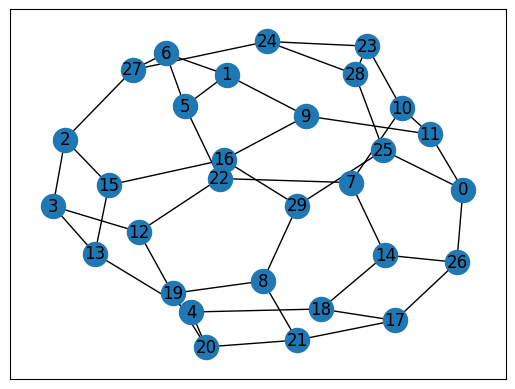

In [66]:
n_vertex=30
graph=nx.random_regular_graph(3,n_vertex)
#p=0.6
#graph=nx.gnp_random_graph(n_vertex,p)
#graph=nx.barabasi_albert_graph(n_vertex,4)
#graph=util.generate_random_graph(n_vertex,0.5)
sum=0
# Assign random weights to edges
for edge in graph.edges():
    #a=np.random.rand(1)[0]
    a=1
    sum+=a
    #graph.edges[edge]['weight'] = np.random.rand()
    graph.edges[edge]['weight'] = 1
nx.draw_networkx(graph)

In [67]:
max=util.branch_and_bound(graph)[0]
gw_cut=util.gw_cut(graph)

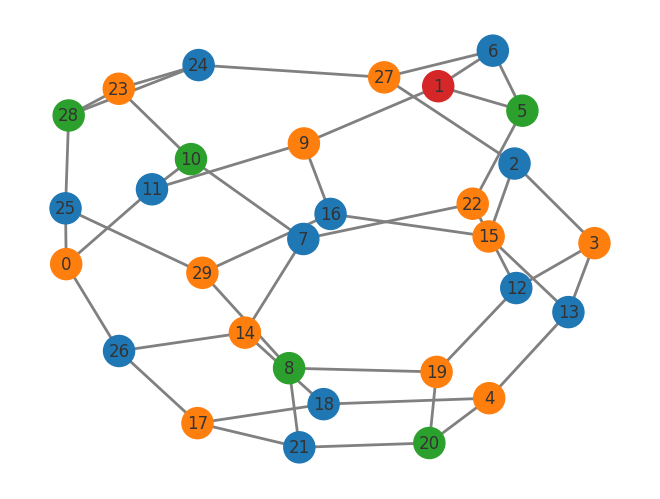

In [68]:
graph_coloring = nx.greedy_color(graph)

unique_colors = set(graph_coloring.values())

# Assign colors to nodes based on the greedy coloring
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in graph.nodes()]

pos = nx.spring_layout(graph, seed=14)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="grey",
    font_size=12,
    font_color="#333333",
    width=2,
)

In [69]:
nft=NFT(maxiter=1000, maxfev=1024, disp=False, reset_interval=1000, options=None)
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=0.01, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.5, beta_1=0.98, beta_2=0.99, noise_factor=1e-08, eps=1e-2, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=0.01, tol=0.01, callback=None, perturbation=None)



estimator_dens= AerSimulator(method='density_matrix')
estimator_state= AerSimulator(method='statevector')
estimator = Estimator()
sampler = Sampler()


In [70]:
n_vertex=len(graph.nodes())
num_qubits=len(util.operator_vertex(graph)[0][0])
alpha=np.sqrt(len(graph.nodes()))

ans_ent=ansatz_circ.ansatz_efficient(num_qubits,int(num_qubits/2)+1)
ans=ansatz_circ.sep_ansatz(graph,3)
circuits=ansatz_circ.multibasis_ansatz(ans)
circuits_ent=ansatz_circ.multibasis_ansatz(ans_ent)

12
3
12
3
5
2
7


In [71]:
util.graph_to_paulis(graph)

12
3
12
3
5
2


[[0,
  [2, 24, 25, 16, 12, 6, 13, 18, 21, 11, 26, 7],
  [0, 1, 2],
  ['ZII',
   'IZI',
   'IIZ',
   'XII',
   'IXI',
   'IIX',
   'YII',
   'IYI',
   'IIY',
   'ZZI',
   'ZIZ',
   'IZZ']],
 [1,
  [27, 29, 19, 22, 23, 3, 4, 17, 9, 0, 14, 15],
  [3, 4, 5],
  ['ZII',
   'IZI',
   'IIZ',
   'XII',
   'IXI',
   'IIX',
   'YII',
   'IYI',
   'IIY',
   'ZZI',
   'ZIZ',
   'IZZ']],
 [2, [28, 5, 8, 10, 20], [6, 7], ['ZI', 'IZ', 'XI', 'IX', 'YI']],
 [3, [1], [8], 'Z']]

In [72]:
util.operator_vertex(graph)

12
3
12
3
5
2


[['IIIIIIIIZ', 1],
 ['ZIIIIIIII', 12],
 ['IIIIIXIII', 12],
 ['IIIYIIIII', 12],
 ['IIIIIIIZI', 5],
 ['IIXIIIIII', 12],
 ['IZZIIIIII', 12],
 ['IIIIIIXII', 5],
 ['IIIIIYIII', 12],
 ['IIIIIIIXI', 5],
 ['ZZIIIIIII', 12],
 ['IXIIIIIII', 12],
 ['YIIIIIIII', 12],
 ['IIIZIZIII', 12],
 ['IIIIZZIII', 12],
 ['XIIIIIIII', 12],
 ['IIIIYIIII', 12],
 ['IYIIIIIII', 12],
 ['IIIIIZIII', 12],
 ['IIIIIIYII', 5],
 ['IIYIIIIII', 12],
 ['IIIXIIIII', 12],
 ['IIIIXIIII', 12],
 ['IZIIIIIII', 12],
 ['IIZIIIIII', 12],
 ['ZIZIIIIII', 12],
 ['IIIZIIIII', 12],
 ['IIIIIIZII', 5],
 ['IIIIZIIII', 12],
 ['IIIZZIIII', 12]]

In [73]:
stat=1
res_quad_sep_warm=[]
res_quad_ent_warm=[]
res_nonlin_sep_warm=[]
res_nonlin_ent_warm=[]
for i in range (stat):


    gw_cut=util.gw_cut(graph)
    beta=1
    v=gw_cut
    gamma=0
    cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=1, tol=0.01, options=None)
    intermediate_info_init= []
    def callback(data):
        intermediate_info_init.append(data)
    qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_init=qrao.compute_minimum_eigenvalue(min)
    new_init_sep=result_init.optimal_parameters


    qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_init_ent=qrao.compute_minimum_eigenvalue(min)
    new_init_ent=result_init_ent.optimal_parameters


    v=0
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao.optimal_parameters
    v=gw_cut/2
    gamma=1
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    #intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    res_quad_sep_warm.append(result_qrao.eigenvalue/max)
    


    v=gw_cut
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_sep,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao_non.optimal_parameters


    v=gw_cut/2
    gamma=1

    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    #intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    res_nonlin_sep_warm.append(result_qrao_non.eigenvalue/max)







    v=0
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_ent,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao.optimal_parameters
    v=gw_cut/2
    gamma=1
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    #intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    res_quad_ent_warm.append(result_qrao.eigenvalue/max)
    


    v=gw_cut
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init_ent,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao_non.optimal_parameters


    v=gw_cut/2
    gamma=1

    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
    #intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    res_nonlin_ent_warm.append(result_qrao_non.eigenvalue/max)

12
3
12
3
5
2
12
3
12
3
5
2
12
3
12
3
5
2
approxs
0.6250160952290529
-0.625098371481256
0.4722222222222222
approxs
0.6271306333614272
-0.6372345647471557
0.5277777777777778
approxs
0.6276971830864734
-0.6329638056726075
0.5
approxs
0.6282554183359556
-0.6356464756934682
0.5
approxs
0.6279395126111508
-0.6373983878629019
0.5277777777777778
approxs
0.6173643778483417
-0.6037832305169818
0.4722222222222222
approxs
0.6271521639158091
-0.6369084152431685
0.5277777777777778
approxs
0.6274831510351235
-0.627491651560049
0.5
approxs
0.6274919806829017
-0.6353617946253899
0.5
approxs
0.6284370584506762
-0.6391803128711588
0.5277777777777778
approxs
0.6241129911132508
-0.6168580703519742
0.5
approxs
0.6284370584506762
-0.6391803128711587
0.5277777777777778
approxs
0.6191661305623639
-0.6135897466067767
0.5
approxs
0.6053800703636123
-0.5574602031063569
0.5555555555555556
approxs
0.6176178794541507
-0.588344660460531
0.5555555555555556
approxs
0.6466738847779453
-0.6890220958405604
0.722222222222

In [74]:
res_gw=[]
for i in range (stat):


    gw_cut=util.gw_cut(graph)
    res_gw.append(gw_cut/max)

In [75]:
res_quad_sep=[]
res_quad_ent=[]
res_nonlin_sep=[]
res_nonlin_ent=[]
for i in range (stat):
    v=0
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
    intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao.optimal_parameters
    v=gw_cut/2
    gamma=1
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
    #intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    res_quad_sep.append(result_qrao.eigenvalue/max)
    


    v=gw_cut
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
    intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao_non.optimal_parameters


    v=gw_cut/2
    gamma=1

    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
    #intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    res_nonlin_sep.append(result_qrao_non.eigenvalue/max)







    v=0
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
    intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao.optimal_parameters
    v=gw_cut/2
    gamma=1
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
    #intermediate_info_qrao= []
    def callback(data):
        intermediate_info_qrao.append(data)
    qrao=vqe_class.QRAO_quadratic_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao= qrao.compute_minimum_eigenvalue(min)
    res_quad_ent.append(result_qrao.eigenvalue/max)
    


    v=gw_cut
    gamma=0
    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
    intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=None,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    new_init=result_qrao_non.optimal_parameters


    v=gw_cut/2
    gamma=1

    cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
    #intermediate_info_qrao_non_linear= []
    def callback(data):
        intermediate_info_qrao_non_linear.append(data)
    qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=None,initial_parameters=new_init,callback=callback)
    result_qrao_non= qrao.compute_minimum_eigenvalue(min)
    res_nonlin_ent.append(result_qrao_non.eigenvalue/max)

12
3
12
3
5
2
approxs
0.6180116475236788
-0.6156488099637472
0.5555555555555556
approxs
0.6180767749734327
-0.6159410867086919
0.5555555555555556
approxs
0.6182382203612106
-0.616239161826515
0.5555555555555556
approxs
0.6182438820862005
-0.6162215393667766
0.5555555555555556
approxs
0.618174036105914
-0.6159731988036156
0.5555555555555556
approxs
0.618400452774903
-0.6181378242917592
0.5555555555555556
approxs
0.6185544385579005
-0.6185469886774682
0.5555555555555556
approxs
0.6185237865800208
-0.6183216017778259
0.5555555555555556
approxs
0.6185470681483287
-0.6181893512109705
0.5555555555555556
approxs
0.6186497195209977
-0.6200601454719307
0.5833333333333334
approxs
0.6186546891859351
-0.6200563699366888
0.5833333333333334
approxs
0.6186546891859351
-0.6200563699366889
0.5833333333333334
approxs
0.6186803536567098
-0.6200336657561656
0.5833333333333334
approxs
0.6175628125954529
-0.6089972376457667
0.5833333333333334
approxs
0.6230972594247882
-0.6496805692797776
0.75
approxs
0.624

In [76]:
print(np.mean(np.array(res_quad_sep_warm)))
print(np.std(np.array(res_quad_sep_warm)))

print(np.mean(np.array(res_quad_ent_warm)))
print(np.std(np.array(res_quad_ent_warm)))

0.9230769230769231
0.0
0.7948717948717948
0.0


In [77]:
print(np.mean(np.array(res_quad_sep)))
print(np.std(np.array(res_quad_sep)))

print(np.mean(np.array(res_quad_ent)))
print(np.std(np.array(res_quad_ent)))

0.9230769230769231
0.0
0.8974358974358975
0.0


In [78]:
print(np.mean(np.array(res_nonlin_sep_warm)))
print(np.std(np.array(res_nonlin_sep_warm)))

print(np.mean(np.array(res_nonlin_ent_warm)))
print(np.std(np.array(res_nonlin_ent_warm)))

0.9230769230769231
0.0
1.0256410256410255
0.0


In [79]:
print(np.mean(np.array(res_nonlin_sep)))
print(np.std(np.array(res_nonlin_sep)))

print(np.mean(np.array(res_nonlin_ent)))
print(np.std(np.array(res_nonlin_ent)))

0.9743589743589743
0.0
0.9487179487179487
0.0


In [80]:
print(np.mean(np.array(res_gw)))
print(np.std(np.array(res_gw)))

0.9230769230769231
0.0
